# Hola Carlos! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Carlos. En general tu notebook está muy bien y completo, pero faltan algunos gráficos y análisis para tenerlo completo. Además, es importante que corrijas el periodo de tiempo relevante. Te dejé indicaciones de cómo corregirlos, revísalas y realiza las modificaciones necesarias.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Carlos, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

---

# PROYECTO 

# Análisis Tienda Online Ice

**Categoría:** Venta de videojuegos

A continuación se manipulará los registros para obtener insights para toma de decisiones, apegandose al siguiente esquema de trabajo: 

1. Importar datos
2. Preprocesamiento de los datos
3. Análisis de datos
4. Indicadores por regiones
5. Pruebas de hipótesis

# PASO 1: Importar datos

***Importar datos***
 - Importando librerias
 - Cargando archivo

In [1]:
# Importando librerías

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene

# Cargando archivo de ventas historicas de Tienda Online Ice

df=pd.read_csv("/datasets/games.csv")

# Comprobando carga de Dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# Información general de Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Observaciones iniciales:*

- **Textos**: Se observa que los nombres de columnas estan con mayúsculas y minúsculas, al igual que la información en cada una de las columnas.
- **Tipos de datos**: "Year_of_Release" esta en tipo float64, lo ideal sería que fuera int; "User_Score" se encuentra como object, lo ideal sería que fuera float64. 
- **Inconsistencia en registros**: El dataframe contiene 16,715 registros, sin embargo en algunas columnas se observan menos registros al total, esto es indicio de la existencia de valores ausentes o nulos, este escenario se presenta en las columnas "Critic_Score", "User_Score" y "Rating".
- **Caso peculiar**: En específico en "User_Score" se observa el valor tbd, en referencia a "To Be Determined", conforme realizamos las adecuaciones determinaremos la pertinencia del enfoque para atender dicho valor.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Bien con la revisión inicial.

</div>

# Paso 2: Preprocesamiento de datos

Se procede a preprocesar los datos 
- Homologando textos a minúsculas
- Tratamiento de valores ausentes
- Verificando y adaptando tipos de datos (int, float, string)
- Casos  TBD "To be determined"
- Describe las columnas que fueron modificadas
- Calcular ventas totales de todas las regiones para cada juego

In [3]:
# Convirtiendo nombres de columnas a minúsculas
df.columns=df.columns.str.lower()

# Comprobando modificación 
print("Comprobando modificación de nombres de columnas a minúsculas")
print(df.columns)
# Borrando las filas donde se presentan valores ausentes en "name" y "genre"
df = df.dropna(subset=['name', 'genre'])
# Convirtiendo a minúsculas columnas "name" y "genre"
df['name']=df['name'].str.lower()
df['genre']=df['genre'].str.lower()

# Imprimiendo cantidad de valores ausentes
df.isna().sum()

Comprobando modificación de nombres de columnas a minúsculas
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [4]:
# Convirtiendo texto de name y platform a minusculas
df['name']=df['name'].str.lower()
df['platform']=df['platform'].str.lower()

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con el uso de snakecase

</div>

*Valores ausentes*
 
 Convirtiendo columna a numeric, para poder analizar su tendencia

In [5]:
# Aplicando .pd_to_numeric, para normalizar y evitar errores
df['user_score']=pd.to_numeric(df['user_score'], errors="coerce")
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Obteniendo métricas de columnas cuantitativas
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


*Complemento de metricas* 

Se utilizara prueba skew() para determinar como rellenar valores ausentes

In [6]:
# Obteniendo mediana de columnas cuantitativas a procesar
print(df['year_of_release'].median())
print(df['critic_score'].median())
print(df['user_score'].median())

# Determinando si columnas presentan sesgo en su distribución
df['year_of_release'].skew()

2007.0
71.0
7.5


-0.9749838728792521

In [7]:
# Sesgo en columna critic_score
df['critic_score'].skew()

-0.6136462286413596

In [8]:
# Sesgo en columna user_score
df['user_score'].skew()

-1.2546147443760038

Las pruebas indican que las tres columnas presentan un sesgo de moderado a alto a la izquierda.

**Tip:**
*La prueba skew() si el resultado es 0, la distribución es normal (simetrica); si es menor a 0, el sesgo es a la izquierda; si es mayor a 0, el sesgo es a la derecha*

In [9]:
#Procesando valores ausentes con valor irreal
df['year_of_release']=df['year_of_release'].fillna(-1)
df['critic_score']=df['critic_score'].fillna(-1)
df['user_score']=df['user_score'].fillna(-1)

# Convirtiendo year_of_release y critic_score a integer
df['year_of_release']=df['year_of_release'].astype(int)
df['critic_score']=df['critic_score'].astype(int)

# Comprobando reemplazo de valores ausentes
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Por lo general, no es buena idea rellenar todos los ausentes por la mediana de toda la data. Lo ideal es realizar una segmentación de los datos nulos y rellenar los nulos según al segmento que pertenece. Por ejemplo, para el año de lanzamiento, podrías haber segmentado por consola y luego rellenar los datos según la mediana de los años de lanzamiento de la consola en cuestión. Por ejemplo, la mediana de toda la data podría ser 2005, pero si hay un nulo de PS4, no hace sentido rellenarlo por ese año, ya que la consola ni siquiera existía. En ese caso, la mediana de los años de los juegos de PS4 sería mejor candidato de imputación. 
    
De todos modos, para este notebook, no requerimos imputar estos directamente, puedes dejar los nulos como `unknown` o algún valor irreal (-1 por ejemplo)

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Agradezco mucho tu guía Oscar, ya que diría que el 80% del tiempo del proyecto lo inverti en limpiar los datos ya que me causaba confusión, aclarado eso, procedo a colocar valores irreales en variables cuantitativas y unknown en variable cualitativa, para posteriormente segmentarlo
</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, corregido!

</div>

In [10]:
# Tratamiento de valores ausentes en columna cualitativa
df['rating'] = df['rating'].fillna("unknown")

# Comprobando sustitución de valores ausentes


# Generando dataframe, excluyendo filas con valor de -1 y unknown
df_clean=df[~((df['year_of_release']==-1) | 
            (df["critic_score"]==-1) | 
            (df["user_score"]==-1) | 
            (df['rating']=='unknown'))].copy()

# Generando dataframe de filas con valor -1, para no perder información (fines documentales)
df_filled=df[(df['year_of_release']==-1) | 
             (df["critic_score"]==-1) | 
             (df["user_score"]==-1) | 
             (df['rating']=='unknown')].copy()

# Comprobando datos limpios
df_clean.info()
print('datos limpios')
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   int64  
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   int64  
 9   user_score       6826 non-null   float64
 10  rating           6826 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 639.9+ KB
datos limpios


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E


In [11]:
# Comprobando datos excluidos
print('datos excluidos')
df_filled.head()

datos excluidos


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,-1,-1.0,unknown


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero mismo comentario anterior. Podrías rellenar con la moda según género. De todos modos, para este notebook, no requerimos imputar estos directamente, puedes dejar los nulos como `unknown` o algún valor irreal (-1 por ejemplo)

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Como buena práctica, verifico siempre los dataframes, tanto el de interes, como el de la información que fue excluida
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, corregido!

</div>

***Descripción de columnas modificadas en tipos de datos***

- Textos en minúsculas: aplicado a nombres de columnas, "name" y "genre", para facilitar busqueda y agrupación de valores
- Tratamiento de valores ausentes en columnas cuantitativas por valor irreal, esto posteriormente se filtrara para quedarnos con el segmento de datos util para los cálculos posteriores, el mismo enfoque se tuvo en la variable cualitativa de rating, en valores ausentes se lleno con valor "unknown" y después se excluyo
- Conversion de year_of_release y critic_score a int, ya que los decimales son 0 en ambas columnas

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Modifico la lógica aplicada para los valores ausentes
</div>


***Explicar hipótesis porque hay valores ausentes o en blanco***



Probablemente hay valores ausentes debido a que no se pudo extraer el valor de los criticos o usuarios, al no realizar las pruebas para dicho valor, sería importante conocer a partir de que año se empezaron a estilar estos valores. También es importante contextualizar que la industria de los videojuegos ha evolucionado de manera abismal, por lo que dicha metrica pudo no ser registrada debido a la importancia que tenía la industria en esa epoca

***Descripción de modificación y tratamiento de valores ausentes y TBD "To be determined"***

Los valores *"tbd"* en la columna user_score, se incluyeron en el trato a los valores ausentes de la columna

**Hipótesis de porque estaba en la columna esta leyenda**

La leyenda pudo haber sido aplicada a juegos que tuvieran una popular emergente, pero que no alcanzaban la deseada, o por su lado, pudieron haber sido parámetros de los encargados de evaluar dicho juego y por cuestiones de logistica o tiempo no lograron realizarlo.

**Explicación de su tratamiento como valores ausente**

En el presente análisis se busco incluir los 2424 registros de "tbd" al estudio, debido a que representaban un 14% de los registros totales, al aplicar *"pd.to_numeric"* se convirtió a NaN, debido al parametro *errors="coerce"*, y al ser un valor ausente general (por ponerle algún nombre), se reemplazo por el valor irreal.

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Se modifico la lógica aplicada para valores "tbd"
</div>

# Paso 3: Análisis de datos

Obtención de indicadores:

  - Número de juegos lanzados en diferentes años
  - Variación de ventas de cada plataforma
  - Determinar de que año tomar los datos
  - Discusión de comportamientos
  - Diagrama de caja para ventas globales de todos los juegos
  - Exploración de correlación entre reseñas y ventas 
  - Comparación de las ventas de los mismos juegos en otras plataformas
  - Distribución de los juegos por género

***Número de juegos lanzados en diferentes años***

In [12]:
# Número de juegos lanzados en diferentes años
game_by_years=df_clean.groupby('year_of_release')['name'].count()
game_by_years

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     13
1998     25
1999     30
2000    102
2001    256
2002    455
2003    498
2004    476
2005    562
2006    528
2007    590
2008    592
2009    550
2010    429
2011    454
2012    313
2013    266
2014    253
2015    211
2016    212
Name: name, dtype: int64

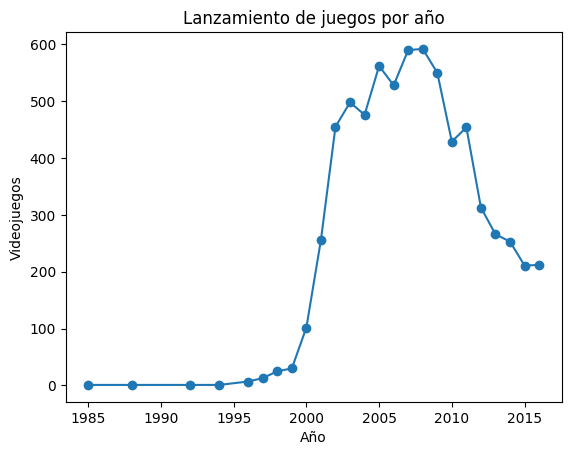

In [13]:
# Grafico sobre lanzamiento de videojuegos por año
game_by_years.plot(title="Lanzamiento de juegos por año",
                   style="o-",
                   xlabel="Año",
                   ylabel="Videojuegos")
plt.show()


*¿Es significativo?*

Se observa un auge de los videojuegos en 2007 y 2008, con más de 590 juegos lanzados por año, esto se debe a la popularidad que fue generando entre los jovenes, quienes eran los principales compradores de videojuegos, también fue la "guerra comercial" entre xbox, playstation, nintendo, entre otras. En estos años se lanzaron cantidad de juegos que algunos perduraron y se volvieron franquicias, mientras otros titulos solo fueron momentaneos, al final de los registros, después del 2012, los jugadores prefirieron optar por juegos con graficos de ultima generación y con jugabilidad en línea, por lo cual pudo haber incentivado a las compañías de las plataformas a enfocarse en desarrollar esas virtudes de los videojuegos en vez de cantidad de videojuegos.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, muy bien con el cálculo, pero muestra esto como un gráfico por año, para visualizar las tendencias de ventas a lo largo del tiempo

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Procedo a generar gráfico de línea para mostrar información por años
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, así es más claro

</div>

***Variación de ventas de cada plataforma***

- Elegir las que tiene mayores ventas y construir una distribución basada en datos de cada año.
- Observar la plataforma que solía ser popular pero que ahora no tiene ventas. ¿Cuanto tarda generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [14]:
# Creación de nueva columna con ventas totales
df_clean["total_sales"]=df_clean["na_sales"] + df_clean["eu_sales"] + df_clean["jp_sales"] + df_clean["other_sales"]

# Variación de ventas de una plataforma a otra por año
pivot_sales_plat_year=df_clean.pivot_table(index="year_of_release",
                                     columns="platform",
                                     values="total_sales",
                                     aggfunc='sum')
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
pivot_sales_plat_year

platform,3ds,dc,ds,gba,gc,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,2.62,17.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,4.12,30.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,0.10,43.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,2.04,NaN,NaN,NaN,0.11,48.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,1.98,NaN,NaN,NaN,3.17,45.66,29.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN


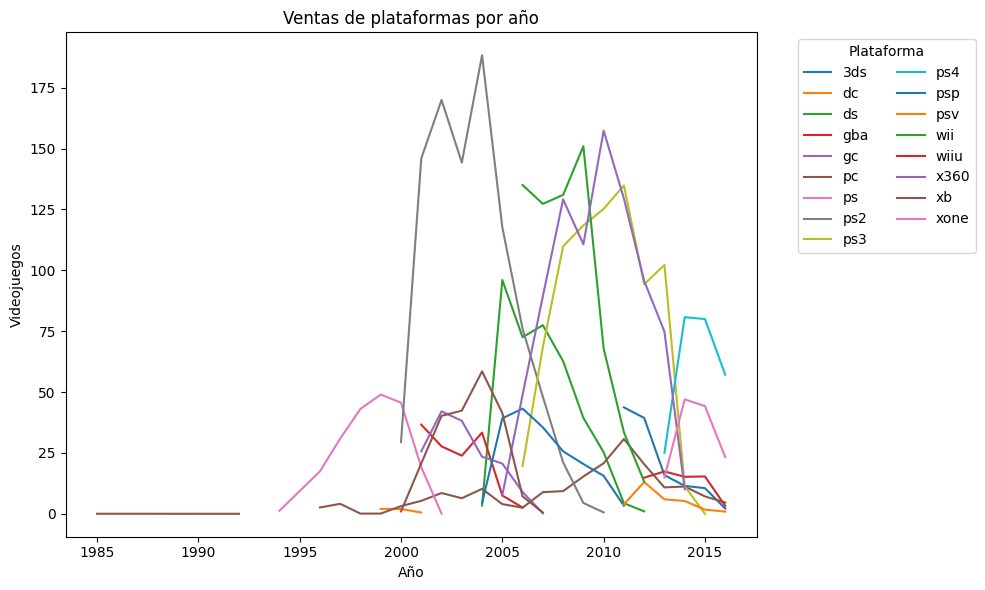

In [15]:
#Gráfico plataformas por años
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos
pivot_sales_plat_year.plot(ax=ax, title="Ventas de plataformas por año",
                           style="-",
                           xlabel="Año",
                           ylabel="Videojuegos")
ax.legend(title="Plataforma",loc="upper left", bbox_to_anchor=(1.05, 1), ncol=2)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con el cálculo de la data, pero para presentarla de forma adecuada, realiza un gráfico de líneas, con una serie (línea) para cada plataforma.
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Se genera gráfico que ilustre de manera mas amigable la información de ventas por plataforma a lo largo de los años
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, muy bien!

</div>

Plataformas que solían ser populares pero que ahora no tienen ventas: 2600(10), dc(5), ds(10), gb(14), gba(8), gc(7), gen(5), n64(7), nes(12), ps(10), ps2(12), psp(12), sat(6), snes(10), xb(9) por mencionar algunas.


Nuevas plataformas: 3ds(6), ps3(11), ps4(4), psv(6), wii(11), wiiu(5), x360(12), xone(4)

Caso peculiar PC: Ha permanecido a lo largo de los años, porque esta plataforma se ha adecuado a los distintos tipos y modalidades de juego, aprovechando el desarrollo tecnológico para actualizarse y mantenerse a la vanguardia.

**¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer**
Las nuevas plataformas tardan en consolidarse en el mercado 2 años, debido a que canalizan las ventas de plataformas antiguas que quedan en absolescencia.

Las antiguas plataformas tardan en desaparecer máximo 12-14 años, y un promedio de 9 años.


***Determinar datos a considerar para análisis***

Basados en las preguntas considera construir un modelo para el 2017. Trabaja solo con los datos relevantes, ignora los años anteriores.

*Explicación de decisión*

Se trabajaran con los datos de las plataformas que presentan ventas en el año 2016, con el registro histórico de 3 años atrás.

In [16]:
# Creando dataframe con registros de consolas a considerar para modelo 2017, aplicando condicion que tengan ventas en 2016
plataformas_activas = df_clean[(df_clean["year_of_release"] == 2016) & (df_clean["total_sales"] > 0.1)]["platform"].unique()
df_2017=df_clean[(df_clean['platform'].isin(plataformas_activas)) & (df_clean['year_of_release']>=2014)]


df_2017.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
1,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
3,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
5,mario kart 8,wiiu,2014,racing,3.15,2.15,1.28,0.51,88,9.1,E,7.09
6,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
7,destiny,ps4,2014,shooter,2.49,2.07,0.16,0.92,76,6.1,T,5.64
8,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
9,uncharted 4: a thief's end,ps4,2016,shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El objetivo de la data a analizar posteriormente es que sea data que sirva para proyectar el 2017. En ese sentido, no se puede utilizar data muy antigua, ya que eso incluiría consolas que ya no existen y tendencias que ya no se repetirán para las consolas aún vigentes. En general, un mínimo de 2 años es suficiente y hasta 4 años puede ser útil. Tomar más años provocaría el problema que menciono.
    
Cambia el periodo de tiempo, reducelo a 3 o 4 años y revisa cómo cambian los análisis de las secciones siguientes. 

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Se ajusto periodo de tiempo a analizar
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, correcto

</div>

Ventas totales de plataformas populares en 2016
platform
ps4     217.93
xone    114.56
wiiu     33.83
3ds      24.21
pc       23.04
psv       7.92
Name: total_sales, dtype: float64


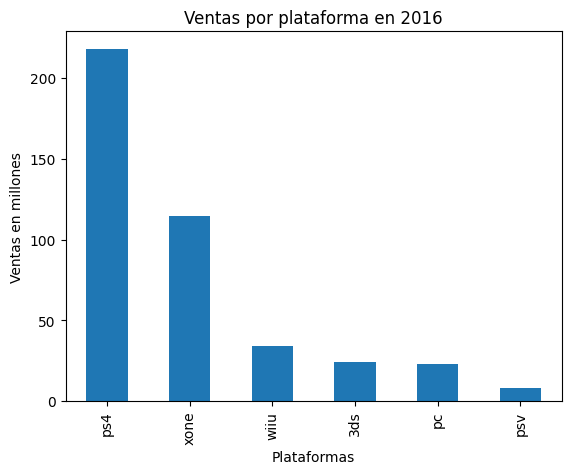


Venta de plataformas populares en 2016 por año
platform           3ds     pc    ps4   psv   wiiu   xone
year_of_release                                         
2014             11.49  11.21  80.76  5.27  15.22  47.01
2015             10.55   7.16  80.01  1.72  15.35  44.26
2016              2.17   4.67  57.16  0.93   3.26  23.29


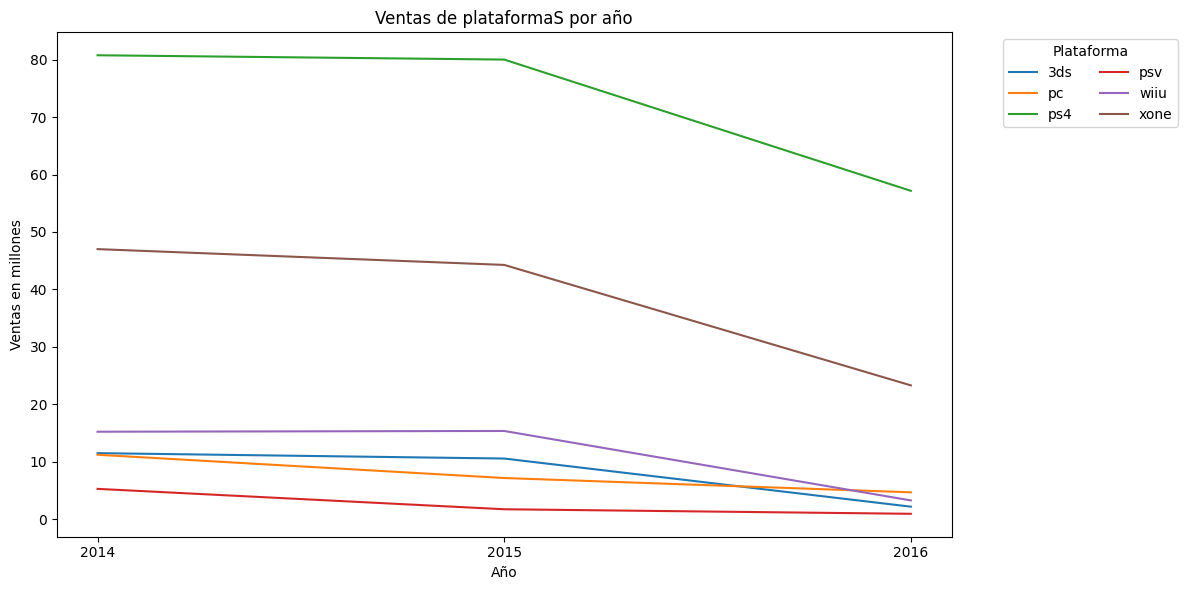

In [18]:
print('Ventas totales de plataformas populares en 2016')
df_plat_2016=df_2017.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(df_plat_2016)
# Gráfico de plataformas populares en 2016
df_plat_2016.plot(xlabel="Plataformas",
                  ylabel="Ventas en millones",
                  title="Ventas por plataforma en 2016",
                 kind="bar")
plt.show()

print('')
print('Venta de plataformas populares en 2016 por año')
df_game_by_platform= df_2017.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()
print(df_game_by_platform)

# Gráfico juegos por plataforma
# Graficar los datos
fig, ax = plt.subplots(figsize=(12, 6))
df_game_by_platform.plot(ax=ax,
                      title="Ventas de plataformaS por año")
ax.set_xticks(df_game_by_platform.index.astype(int))
ax.set_xlabel("Año")
ax.set_ylabel("Ventas en millones")
ax.legend(title="Plataforma",
          bbox_to_anchor=(1.05, 1),
          loc="upper left", ncol=2)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Añadi graficos a ventas por plataforma
</div>

***Discusión de comportamientos***
- ¿Qué plataformas son líderes en ventas?

*Las plataformas líderes en ventas son ps4, xone y wiiu, siendo el que mayor venta obtuvo, el ps4 con 217 millones de dólares


- ¿Cuáles crecen y cuáles se reducen? 

Conforme a los datos se observa que todas las plataformas se reducen para el 2016, aunque en ese año tenía una proyección de crecimiento el ps4 y xone.


- Elige varias plataformas potencialmente rentables

Se observa que las plataformas más rentables proyectadas son ps4 y xone, debido a que sus predecesores ya registraban tendencia a la baja en sus ventas.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien!

</div>

***Diagrama de caja para ventas globales de todos los juegos por plataforma***

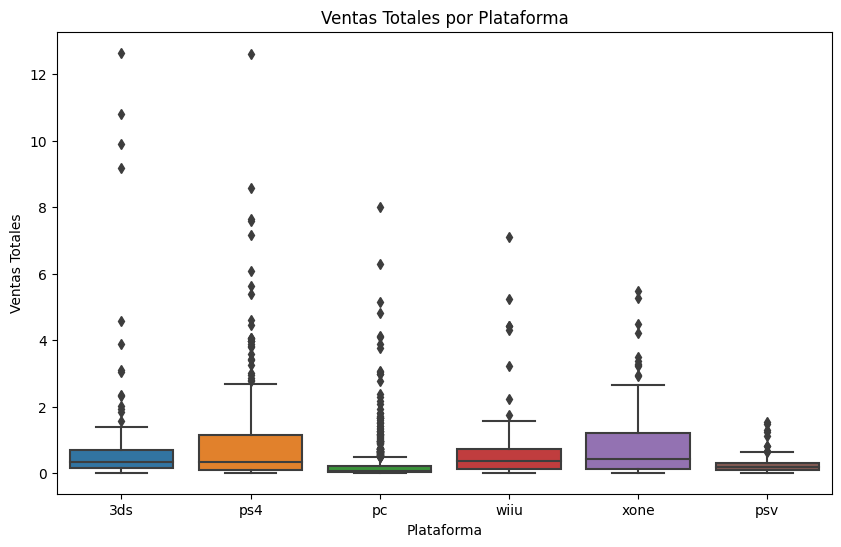

In [19]:
# Gráfico de caja


# Generando gráfico set_1 
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=df_clean[df_clean['platform'].isin(plataformas_activas)])
plt.title(f'Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correctos los gráficos, pero podrías haberlos dejado en uno solo.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Modifique el gráfico para concentrar la información en uno solo.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, así está mejor

</div>

platform
ps4     0.972902
wiiu    0.805476
xone    0.790069
3ds     0.515106
pc      0.223689
psv     0.149434
Name: total_sales, dtype: float64


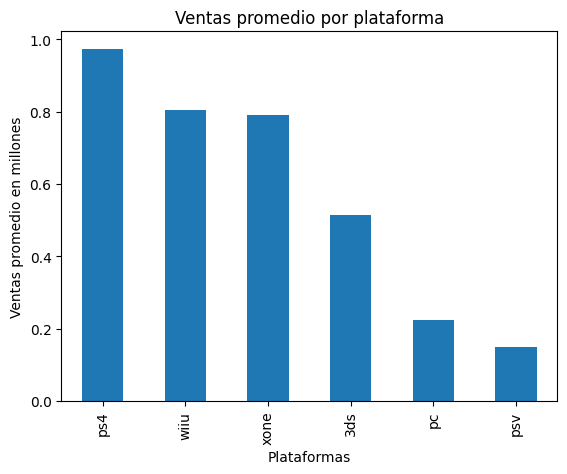

In [20]:
# Obteniendo promedio de ventas por plataforma
df_plat_mean=df_2017.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(df_plat_mean)

df_plat_mean.plot(xlabel="Plataformas",
                  ylabel="Ventas promedio en millones",
                  title="Ventas promedio por plataforma",
                 kind="bar")
plt.show()

- ¿Son significativas las diferencias en las ventas? 

Si son significativas las diferencias de ventas, se observa que PS4 y Xbox One dominan el mercado, seguido por el wiiu


- ¿Qué sucede con las ventas promedio en varias plataformas? 

En plataformas emergentes como PS4 y Xbox One, se observa algo peculiar, el primero tiene dominancia al tener el mayor valor promedio, pero Xbox One tiene el tercer valor promedio más alto, el segundo lo ocupa el wiiu, es decir, el PS4 tiene mayor demanda lo que nos haría sugerir que tiene mayor cantidad de titulos exitosos.

- Descripción de hallazgos.

Existen unicamente dos plataformas emergentes, creando un monopolio con opciones limitadas para plataformas de videojuegos.

*Dato histórico*
La compañía nintendo, creadores de la plataforma wii y wiiu se concentraban en la creación de una nueva plataforma que sería "la nintendo switch" que lanzarían en el año 2017, al detectar que sus plataformas ya cumplian con su ciclo de vida.

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Modifique interpretación al corregir la temporalidad del análisis y añadi gráfico
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho!

</div>

***Exploración de correlación entre reseñas y ventas***


Con base a una plataforma popular, se construye gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

Correlación entre ventas totales y reseñas de PS4
0.40357291073577817


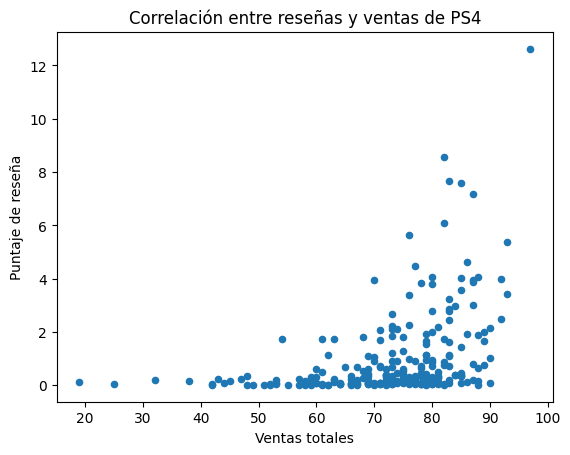

In [21]:
# Agrupación de datos de plataforma con reseñas (critic_score) y ventas
df_ps4=df_clean[df_clean['platform']=="ps4"].copy()

# Construcción de grafico de dispersión
df_ps4.plot(x='critic_score',
            y='total_sales',
            kind='scatter',
            xlabel='Ventas totales',
            ylabel='Puntaje de reseña',
            title='Correlación entre reseñas y ventas de PS4')

# Calculando correlación entre reseñas y ventas
print('Correlación entre ventas totales y reseñas de PS4')
print(df_ps4['total_sales'].corr(df_ps4['critic_score']))

Correlación entre ventas totales y reseñas de PS4
-0.03088781296873357


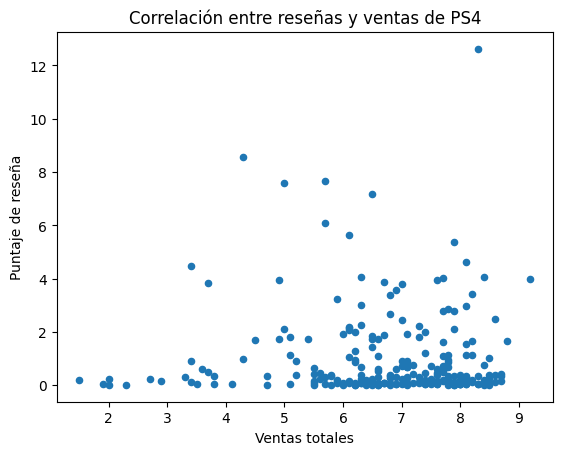

In [22]:
# Datos de plataforma con reseñas (user_score) y ventas

# Construcción de grafico de dispersión
df_ps4.plot(x='user_score',
            y='total_sales',
            kind='scatter',
            xlabel='Ventas totales',
            ylabel='Puntaje de reseña',
            title='Correlación entre reseñas y ventas de PS4')

# Calculando correlación entre reseñas y ventas
print('Correlación entre ventas totales y reseñas de PS4')
print(df_ps4['total_sales'].corr(df_ps4['user_score']))

*Conclusiones*

Se observa una moderada correlación positiva entre ventas totales('total_sales') y puntaje de reseña emitido por expertos('critic_score'). En contraste, no se observa correlación alguna entre las ventas totales y el puntaje de reseña emitido por los jugadores ('user_score')

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Modifique interpretación al realizar el segundo gráfico y correlación entre las ventas totales y el puntaje de reseña de los jugadores
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, correcto con el gráfico y el coeficiente

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Realiza un análisis similar para con el score de los usuarios

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto

</div>

***Venta de juegos en distintas plataformas:***


En sintonía a conclusiones previas, se realiza comparación de ventas de los mismos juegos en otras plataformas.

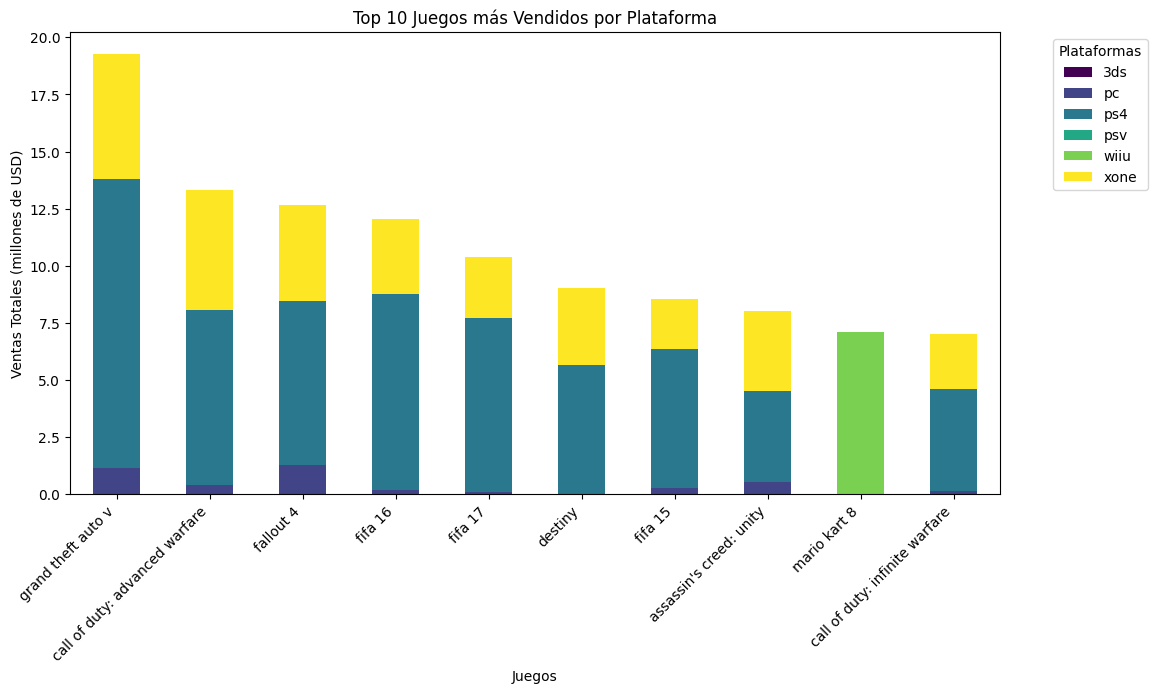

In [23]:
# Comparación de juegos en otras plataformas
pivot_games_by_platform=df_2017.pivot_table(index='name',
                                           columns='platform',
                                           values='total_sales',
                                           aggfunc='sum')
pivot_games_by_platform

# Obteniendo top 10 juegos con más ventas
top_10_games = pivot_games_by_platform.sum(axis=1).nlargest(10)
top_10_df = pivot_games_by_platform.loc[top_10_games.index]

#Graficando
top_10_df.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12,6))
plt.xlabel("Juegos")
plt.ylabel("Ventas Totales (millones de USD)")
plt.title("Top 10 Juegos más Vendidos por Plataforma")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Estos resultados son mejores presentados en gráficos. Escoge los juegos con más venta en total y compara la venta por plataforma en gráficos de barra

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Realice gráfico para visualizar el volumen vendido del top 10 de juegos, en las diferentes plataformas
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, aunque en vez de hacer barras apiladas, te sugiero que uses barras separadas, hará la comparación más fácil

</div>

***Distribución de juegos por género***


*Distribución general de los juegos por género*

Ventas de género por año
genre            action  adventure  fighting  misc  platform  puzzle  racing  \
year_of_release                                                                
2014              56.46       0.50      0.45  3.71      8.16    1.19   14.08   
2015              43.28       3.44      6.29  7.14      5.64    0.09    4.60   
2016              19.25       1.47      4.15  0.75      1.20     NaN    2.04   

genre            role-playing  shooter  simulation  sports  strategy  
year_of_release                                                       
2014                    13.71    44.22        3.59   24.49      0.40  
2015                    25.34    27.46        4.24   30.16      1.37  
2016                     4.75    35.22        1.31   20.56      0.78  


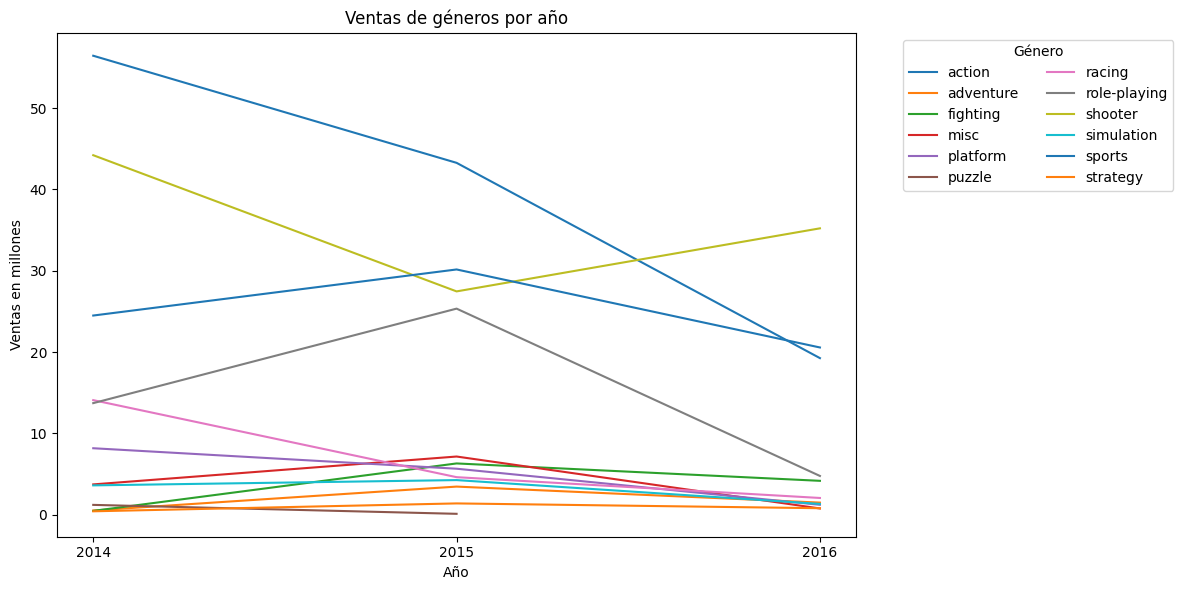

Concentrado de ventas por género
genre
action          118.99
shooter         106.90
sports           75.21
role-playing     43.80
racing           20.72
platform         15.00
misc             11.60
fighting         10.89
simulation        9.14
adventure         5.41
strategy          2.55
puzzle            1.28
Name: total_sales, dtype: float64


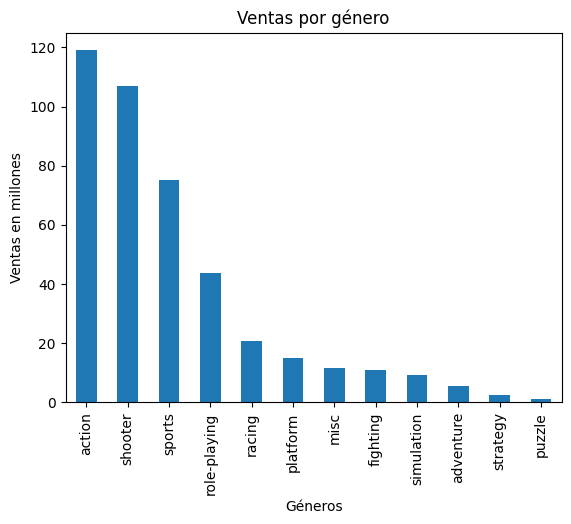

Ventas promedio por género
genre
shooter         1.353165
sports          1.030274
simulation      0.609333
action          0.577621
platform        0.576923
racing          0.560000
role-playing    0.540741
fighting        0.473478
misc            0.386667
puzzle          0.320000
adventure       0.200370
strategy        0.196154
Name: total_sales, dtype: float64


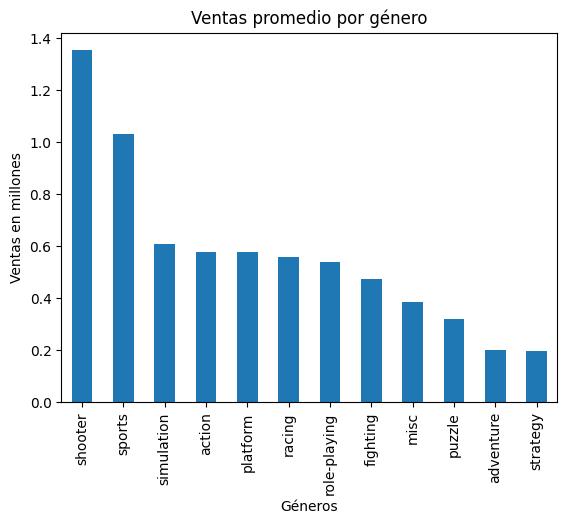

In [24]:
# Agrupación de juegos por género
print('Ventas de género por año')
df_game_by_genre=df_2017.groupby(['year_of_release','genre',])['total_sales'].sum().unstack()
print(df_game_by_genre)

# Gráfico juegos por género
# Graficar los datos
fig, ax = plt.subplots(figsize=(12, 6))
df_game_by_genre.plot(ax=ax,
                      title="Ventas de géneros por año")
ax.set_xticks(df_game_by_genre.index.astype(int))
ax.set_xlabel("Año")
ax.set_ylabel("Ventas en millones")
ax.legend(title="Género",
          bbox_to_anchor=(1.05, 1),
          loc="upper left", ncol=2)
plt.tight_layout()
plt.show()

# Ventas concentradas por género
print('Concentrado de ventas por género')
df_gen_sumarized=df_2017.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(df_gen_sumarized)
# Gráifco de ventas por género
df_gen_sumarized.plot(xlabel="Géneros",
                      ylabel="Ventas en millones",
                      title="Ventas por género",
                      kind="bar")
plt.show()


# Ventas promedio por género
print("Ventas promedio por género")
df_gen_mean=df_2017.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(df_gen_mean)
# Gráifco de ventas promedio por género
df_gen_mean.plot(xlabel="Géneros",
                      ylabel="Ventas en millones",
                      title="Ventas promedio por género",
                      kind="bar")
plt.show()

- ¿Qué se puede decir de los géneros más rentables? 

Los tres generos con mayores ventas son acción, disparos y deportes; presentan una diferencia considerable con respecto a la cuarta posición ya que el tercero (deportes) estan por arriba de los 75 millones de dólares, en tanto que el género más rentable supera los 115 millones de dólares. En contraste se observa que las ventas promedio por género aparecen en el top 3 los juegos de disparos, deportes y simulación, proyectando que en el corto mediano plazo los juegos de disparos son los que recabaran mayores ventas junto con deportes; el caso de los juegos de simulación es un género relativamente conocido pero ha venido ganando terreno por el desarrollo de gráficos de las plataformas, y año con año va ganando popularidad, la venta promedio de dicho genero puede ser indicativo que esos juegos han ganado popularidad o hay un titulo que esta siendo un exito.

El género Acción domina en cantidad total de ventas, pero su promedio por juego es menor, lo que indica que hay muchos juegos de este tipo en el mercado.

- ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los géneros con ventas altas como disparos, deportes, acción y juegos de rol. Dominan el mercado porque tienen grandes franquicias, jugadores leales y presencia en múltiples plataformas.

Los géneros con ventas bajas como estrategia, puzzle, aventura y simulación. Son géneros con públicos más específicos, lo que limita su impacto comercial en el mercado global.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Ok pero la rentabilidad no solo es el total de ventas, sino que también hay que ver la venta promedio por género. Grafica estos datos que calculaste aquí y también calcula y grafica la venta promedio de cada género. 

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Realice gráficos para visualizar los indicadores de rentabilidad (venta por género por año, venta total por género y venta promedio por género)
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien!

</div>


# Paso 4: Indicadores por región
Para cada región determinar:
- Plataformas principales
- Géneros principales
- Relación entre clasificaciones ESRB vs ventas

***Cinco plataformas principales***

In [25]:
# Agrupando ventas por plataformas región NA
df_plat_na=df_2017.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
df_plat_na

platform
ps4     74.49
xone    66.26
wiiu    14.94
3ds      7.80
pc       6.89
psv      1.60
Name: na_sales, dtype: float64

In [26]:
# Agrupando ventas por plataformas región EU
df_plat_eu=df_2017.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
df_plat_eu

platform
ps4     101.03
xone     37.82
pc       14.50
wiiu     10.64
3ds       5.25
psv       1.35
Name: eu_sales, dtype: float64

In [27]:
# Agrupando ventas por plataformas región JP
df_plat_jp=df_2017.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
df_plat_jp

platform
3ds     9.94
ps4     8.35
wiiu    5.78
psv     4.06
xone    0.27
pc      0.00
Name: jp_sales, dtype: float64

*Describe variaciones en sus cuotas de mercado de una región a otra*

Se observa que las principales plataformas varian dependiendo la región, en norteamérica el top 5 lo conforman: PS4, Xbox One, Wiiu, 3ds y PC; en europa es el ps4, Xbox One, PC, Wiiu y 3ds; y en japón es el 3ds, PS4, Wiiu, PSV y Xbox One.

Se observa que en todas las regiones el PS4 se mantiene en el top 3, el XboxOne permanece en el top 3 de américa y europa pero no en japón, y en japón se observa la tendencia de adquirir consolas portatiles, además que es notablemente menor el volumen de venta en esta región.

En norteamerica la primera posición alcanza casi los 75 millones de dólares, en tanto en europa la primera posición rebasa  los 100 millones de dólares, en japón apenas colecta 10 millones de dólares la plataforma favorita de la región.

***Géneros principales***

In [28]:
# Agrupando ventas por género región NA
df_genre_na=df_2017.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
df_genre_na

genre
shooter         48.95
action          47.28
sports          31.66
role-playing    15.94
racing           6.78
misc             5.75
platform         5.68
fighting         4.96
adventure        1.84
simulation       1.79
strategy         0.82
puzzle           0.53
Name: na_sales, dtype: float64

In [29]:
# Agrupando ventas por género región UE
df_genre_eu=df_2017.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
df_genre_eu

genre
action          49.92
shooter         41.20
sports          32.30
role-playing    15.33
racing          10.41
platform         5.40
simulation       4.93
misc             3.40
fighting         3.28
adventure        2.54
strategy         1.48
puzzle           0.40
Name: eu_sales, dtype: float64

In [30]:
# Agrupando ventas por género región JP
df_genre_jp=df_2017.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
df_genre_jp

genre
role-playing    8.03
action          6.77
shooter         3.58
platform        2.54
simulation      1.83
racing          1.46
misc            1.29
fighting        1.25
sports          1.02
adventure       0.34
puzzle          0.26
strategy        0.03
Name: jp_sales, dtype: float64

*Describe variaciones de mercado de una región a otra*

Los géneros cambian ligeramente solo para la región de japon, para norteamerica y europa se comportan de manera similar, con el top 3 conformado por los juegos de disparos, acción y deporte, la diferencia entre ambos es que en la región de norteamerica el genero preferido es el de disparo, mientras en europa es el de acción. Solo en japón el género favorito es juegos de rol, manteniendose los juegos de acción y disparos en segundo y tercer posición respectivamente.

El volumen de ventas en norteamerica y europa similar, ya que el género preferido logro recolectar alrededor de 49 millones de dólares. En japón la diferencia el género más rentable logro colectar 8 millones de dólares.

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Realice modificación en interpretación de resultados al ajustar el período de tiempo
</div>

***Relación calificaciones ESRB vs ventas***

In [31]:
# Relación calificaciones vs ventas región NA
df_rat_na=df_2017.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
df_rat_na

rating
M       81.46
E       37.08
T       32.07
E10+    21.37
Name: na_sales, dtype: float64

In [32]:
# Relación calificaciones vs ventas región EU
df_rat_eu=df_2017.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
df_rat_eu

rating
M       81.30
E       44.69
T       29.59
E10+    15.01
Name: eu_sales, dtype: float64

In [33]:
# Relación calificaciones vs ventas región JP
df_rat_jp=df_2017.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
df_rat_jp

rating
T       9.72
E       8.24
M       6.32
E10+    4.12
Name: jp_sales, dtype: float64

*¿Las clasificaciones afectan las ventas en las regiones?*

En las 3 regiones se observa que la califación que obtuvo mayor recaudación de ventas es la M, con una diferencia de 44 y 37 en norteamerica y europa respectivamnte en japón la mayor recaudación la obtuvo la calificación T, con 9.72 millones de dólares.

Se solicitará mas detalles sobre el significado de cada calificación, en caso de que M, no sea la mayor calificación, se detecta que los jugadores de videojuegos tienen preferencias distintas a los juegos mejor calificados.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con la segmentación por zona. Se observa como Japón es muy diferente de las otras dos

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Realice modificación de la interpretación al ajustar el período de tiempo de análisis
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, correcto

</div>

# Paso 5: Prueba de hipótesis

Pruebas estadísticas:
1. Las califaciones promedio de los usuarios para las plataformas Xbox Ones y PC son las mismas
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
    

***1. Las califaciones promedio de los usuarios para las plataformas Xbox Ones y PC son las mismas***

*Planteamiento de hipótesis*

 - Ho= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 - H1= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas

*alfa=0.05*



In [34]:
# Agrupando valores para prueba estadística
df_xone=df_2017[df_2017['platform']=="xone"]['user_score']
df_pc=df_2017[df_2017['platform']=="pc"]['user_score']

# Valor de alpha
alpha= 0.05

#Determinando si las varianzas son iguales o distintas a través de prueba st.levene()
w_stats , p_value = levene(df_xone,df_pc, center="mean")
print("Valor de p:", p_value)

# Resultado de prueba levene
if p_value>alpha:
    print("No rechazamos la hipótesis nula, es decir, las varianzas son iguales")
else:
    print("Rechazamos la hipótesis nula, es decir, las varianzas no son iguales")
    

Valor de p: 0.0013114238145115235
Rechazamos la hipótesis nula, es decir, las varianzas no son iguales


In [38]:
# Realizando prueba de hipótesis entre dos medias
result_user_score_xone_pc=st.ttest_ind(df_xone, df_pc, equal_var=False)

# Resultado
print('valor p:', result_user_score_xone_pc.pvalue)

if (result_user_score_xone_pc.pvalue>alpha):
    print("No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para ambas plataformas, son las mismas")
else:
    print("Rechazamos la hipótesis nula, las califaciones promedio de los usuarios para ambas plataformas, son diferentes")

valor p: 0.1498449186136679
No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para ambas plataformas, son las mismas


*Conclusión*
Las calificaciones promedio de los usuarios hacia las plataformas Xbox One y PC son las mismas, cabe destacar que ambas muestras de valores presentan varianzas que no son iguales.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, buen uso del test de levene para determinar si usar varianzas iguales o no.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>

Realice modificación en interpretación de resultados al ajustar el período de tiempo de análisis
</div>


***2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes***

*Planteamiento de hipótesis*

 - Ho= Las califaciones promedio de los usuarios para los géneros de Acción y Deporte son las mismas.
 - H1= Las califaciones promedio de los usuarios para los géneros de Acción y Deporte no son las mismas, son diferentes.

*alfa=0.05*


In [39]:
# Agrupando valores para prueba estadística
df_action=df_2017[df_2017['genre']=="action"]['user_score']
df_sports=df_2017[df_2017['genre']=="sports"]['user_score']

#Determinando si las varianzas son iguales o distintas a través de prueba st.levene()
w_stats , p_value = levene(df_action,df_sports, center="mean")
print("Valor de p:", p_value)

# Resultado de prueba levene
if p_value>alpha:
    print("No rechazamos la hipótesis nula, es decir, las varianzas son iguales")
else:
    print("Rechazamos la hipótesis nula, es decir, las varianzas no son iguales")

Valor de p: 0.2807600259575363
No rechazamos la hipótesis nula, es decir, las varianzas son iguales


In [43]:
# Realizando prueba de hipótesis entre dos medias
result_user_score_act_spo=st.ttest_ind(df_action, df_sports, equal_var=True)

# Resultado
print('valor p:', result_user_score_act_spo.pvalue)

if (result_user_score_act_spo.pvalue>alpha):
    print("No podemos rechazar la hipótesis nula, las califaciones promedio de los usuarios para los géneros de Acción y Deporte son las mismas")
else:
    print("Rechazamos la hipótesis nula, las califaciones promedio de los usuarios para los géneros de Acción y Deporte no son las mismas, son diferentes ")

valor p: 2.168716557162963e-08
Rechazamos la hipótesis nula, las califaciones promedio de los usuarios para los géneros de Acción y Deporte no son las mismas, son diferentes 


*Conclusión*

La califación promedio de los usuarios para los géneros de Acción y Deporte son diferentes, por lo que nos hace inferir que los parámetros y sensibilidad a los juegos es distinta por parte de los jugadores hacia estos géneros.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, muy bien con los test!

</div>

# Paso 6: Conclusión general

*Conclusión*

Cada región se destaca por su preferencia hacia las plataformas y volumen de venta, sin embargo, se observan similitudes en generos de preferencia.

Las poblaciones que juegan Xbox One y PC, no presentan similitud en la calificación promedio de los usuarios. Esto nos hace inferir en que los jugadores de estas plataformas no se sienten satisfechos en el mismo nivel.

Al igual que los usuarios que prefieren jugar los géneros de acción y deporte en todas las plataformas. Lo que los hace tener sensibilidad a distintos parámetros de los videojuegos, generando que existan diferencia entre el promedio de sus clasificaciones de usuario.

*Aspectos a destacar:*
- En japón prefieren plataformas portátiles y su volumen es considerablemente menor
- Nintendo, compañía creadora de wii y wiiu, visualizaba el fin del ciclo de estas plataformas por lo cual optaron por desarrollar una nueva en 2017
- La industria de los videojuegos a lo largo del tiempo se dedico más a lanzar titulos con mayor calidad en vez de ofertar mayor cantidad de titulos año con año.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy buenas conclusiones. Me parece muy bien lo hallazgos, especialmente el cambio en ventas y calificaciones con el tiempo.

</div>